In [31]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle
from pprint import pprint

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

# Custom modules (if needed)
# module_path = os.path.join(os.path.expanduser('~'), 'CustomModules')
# sys.path.append(module_path)
# from telegram_notify import notify
# from plotting_tools import error_band_plot, get_ax_data_range

# Add the parent directory to sys.path (if needed)
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent.parent))

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

jtplot.style(context='paper', theme='grade3', grid=False, ticks=True)
DFT_FIG_WIDTH_WIDE = 11
DFT_FIG_WIDTH = 5.3
COLORS = plt.get_cmap('tab10')
# Choose in ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 
# 'tab10', 'tab20', 'tab20b', 'tab20c']

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from simulations.analysis.collect_bb_simulation_data import aggregate_data

ascending_confidences = {
    "cluster_frac": False,
    # "cluster_num": False,
    "total_boundary_size": False,
    "max_cluster_size": False,
    "max_cluster_llr": False,
    "max_cluster_bp_llr": False,
    "max_cluster_bp_llr_plus": False,
    "cluster_llr_gap": True,
    "cluster_llr_norm_gap": True,
    "cluster_bp_llr_gap": True,
    "cluster_bp_llr_plus_gap": True,
    "cluster_bp_llr_plus_norm_gap": True,
    "pred_llr": False,
    "pred_bp_llr": False,
    "detector_density": False,
}

df_agg_dict = {}
for by, ascending_confidence in ascending_confidences.items():
    print(
        f"\nAggregating data for {by} with ascending_confidence={ascending_confidence}..."
    )
    df_agg = aggregate_data(
        by=by,
        n=144,
        p=0.003,
        num_hist_bins=10000,
        ascending_confidence=ascending_confidence,
        verbose=False,
    )
    df_agg_dict[by] = df_agg
    print("=============")


Aggregating data for cluster_frac with ascending_confidence=False...


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]



Aggregating data for total_boundary_size with ascending_confidence=False...


100%|██████████| 20/20 [00:10<00:00,  1.94it/s]



Aggregating data for max_cluster_size with ascending_confidence=False...


100%|██████████| 20/20 [00:10<00:00,  1.99it/s]



Aggregating data for max_cluster_llr with ascending_confidence=False...


100%|██████████| 20/20 [00:11<00:00,  1.72it/s]



Aggregating data for max_cluster_bp_llr with ascending_confidence=False...


100%|██████████| 20/20 [00:09<00:00,  2.19it/s]



Aggregating data for max_cluster_bp_llr_plus with ascending_confidence=False...


100%|██████████| 20/20 [00:11<00:00,  1.80it/s]



Aggregating data for cluster_llr_gap with ascending_confidence=True...


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]



Aggregating data for cluster_llr_norm_gap with ascending_confidence=True...


100%|██████████| 20/20 [00:11<00:00,  1.73it/s]



Aggregating data for cluster_bp_llr_gap with ascending_confidence=True...


100%|██████████| 20/20 [00:12<00:00,  1.63it/s]



Aggregating data for cluster_bp_llr_plus_gap with ascending_confidence=True...


100%|██████████| 20/20 [00:11<00:00,  1.72it/s]



Aggregating data for cluster_bp_llr_plus_norm_gap with ascending_confidence=True...


100%|██████████| 20/20 [00:13<00:00,  1.54it/s]



Aggregating data for pred_llr with ascending_confidence=False...


100%|██████████| 20/20 [00:09<00:00,  2.19it/s]



Aggregating data for pred_bp_llr with ascending_confidence=False...


100%|██████████| 20/20 [00:10<00:00,  1.95it/s]



Aggregating data for detector_density with ascending_confidence=False...


100%|██████████| 20/20 [00:11<00:00,  1.81it/s]

In [33]:
from collect_bb_simulation_data import get_df_ps

df_ps_dict = {}
for by, df_agg in df_agg_dict.items():
    df_ps = get_df_ps(df_agg, ascending_confidence=ascending_confidences[by])
    df_ps_dict[by] = df_ps

In [37]:
def error_band_plot(
    x, y, delta_y, ax=None, color=None, alpha=0.3, y_factor=1, **kwargs
):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y * y_factor, color=color, **kwargs)
    ax.fill_between(
        x,
        (y - delta_y) * y_factor,
        (y + delta_y) * y_factor,
        alpha=alpha,
        color=color,
    )

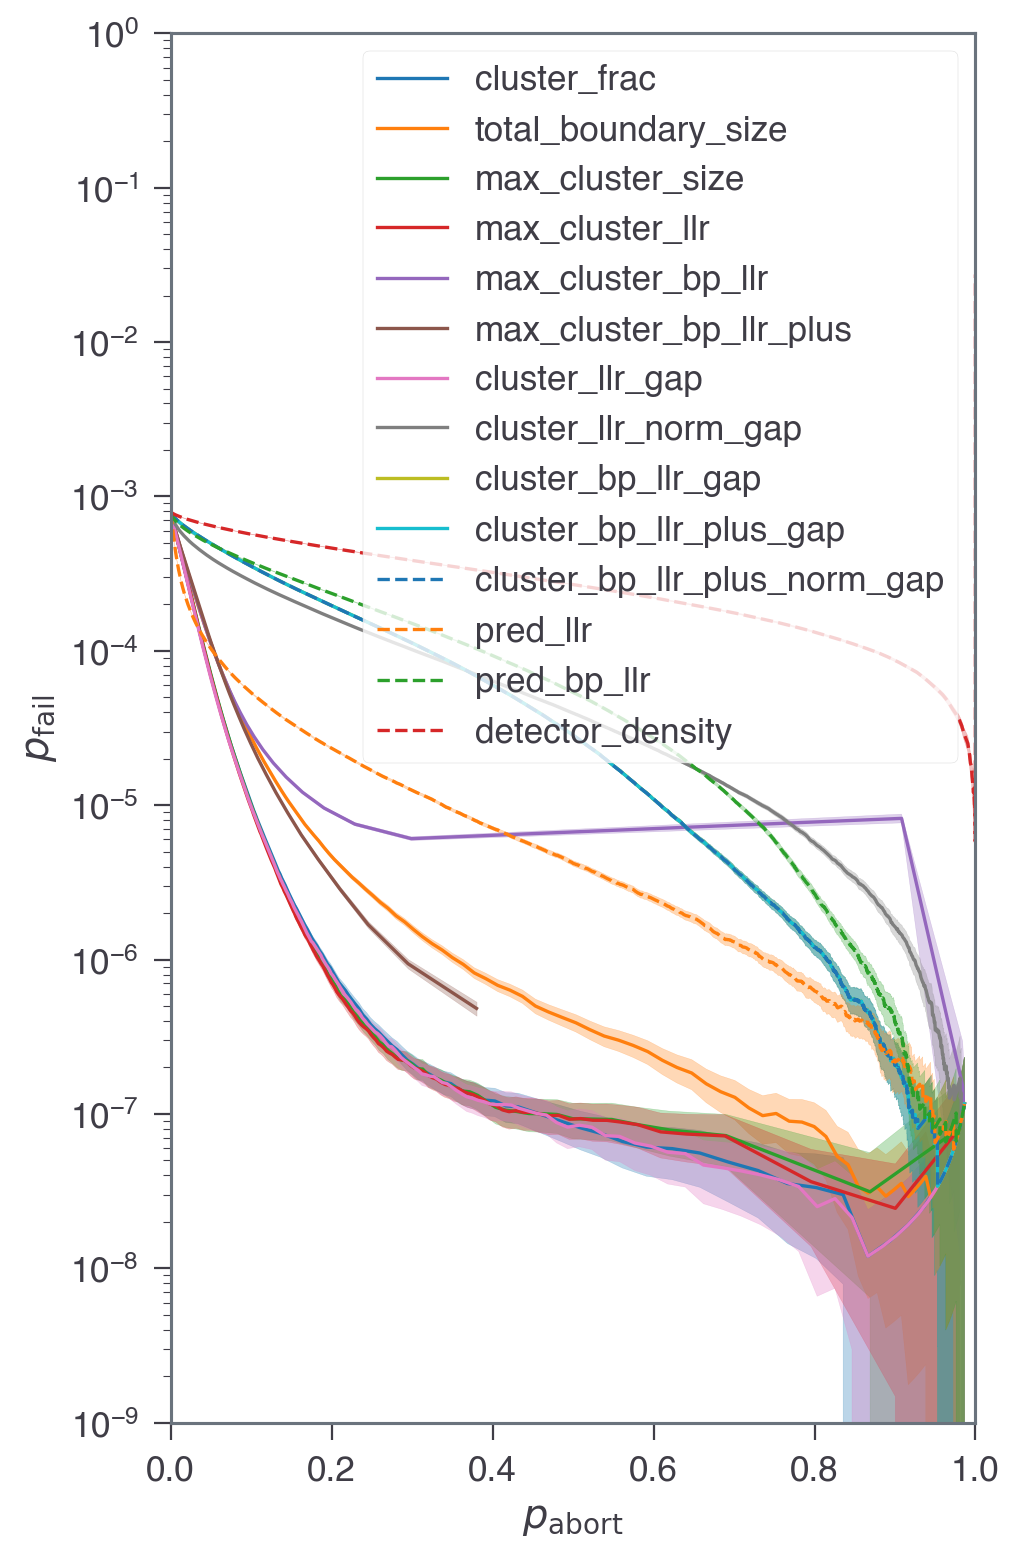

In [43]:
fig, ax = plt.subplots(figsize=(DFT_FIG_WIDTH, 8))

i = 0
data_plots = {}
for by, df_ps in df_ps_dict.items():
    use_conv = by != "detector_density"
    p_abort_col = "p_abort_conv" if use_conv else "p_abort"
    p_fail_col = "p_fail_conv" if use_conv else "p_fail"
    delta_p_fail_col = "delta_p_fail_conv" if use_conv else "delta_p_fail"

    df_ps = df_ps.sort_values(by=p_abort_col)
    p_abort = df_ps[p_abort_col].values
    p_fail = df_ps[p_fail_col].values
    delta_p_fail = df_ps[delta_p_fail_col].values
    data_plots[by] = (p_abort, p_fail, delta_p_fail)

    error_band_plot(
        p_abort,
        p_fail,
        delta_p_fail,
        color=COLORS(i % 10),
        linestyle="-" if i < 10 else "--",
        label=by,
        y_factor=1 / 12,
        ax=ax,
    )
    i += 1

# ax.set_xscale("log")
ax.set_xlim(0, 1)
ax.set_yscale("log")
ax.legend()
ax.set_ylim(1e-9, 1)

ax.set_xlabel(r"$p_\mathrm{abort}$")
ax.set_ylabel(r"$p_\mathrm{fail}$")

fig.tight_layout()

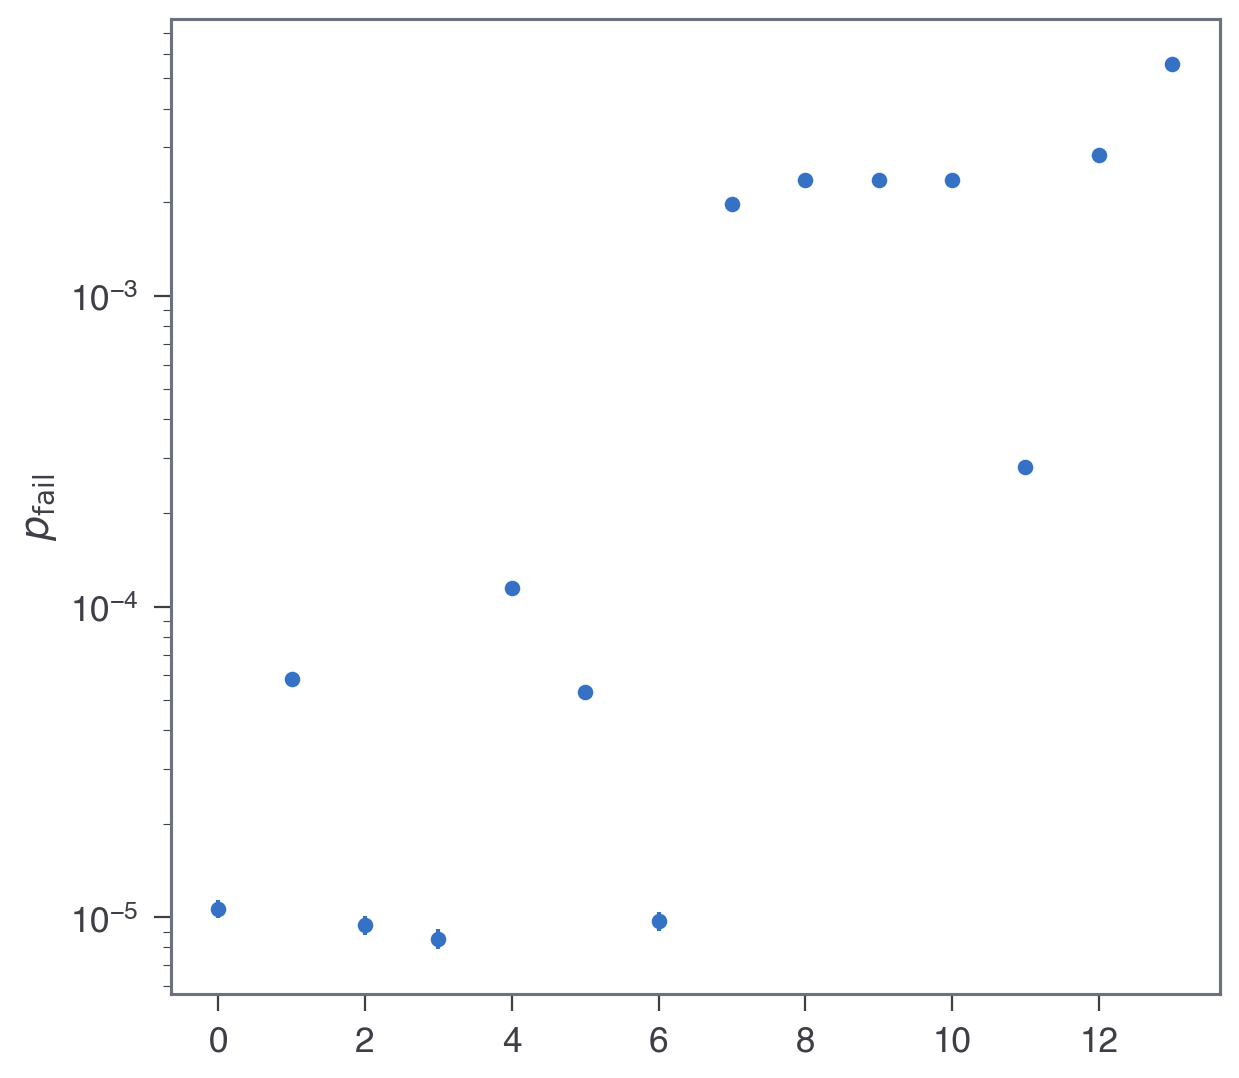

In [49]:
target = 0.2
labels, y_vals, y_errs = [], [], []

for label, (p_abort, p_fail, delta_p_fail) in data_plots.items():
    idx = np.where(p_abort <= target)[0]
    if len(idx):
        sel = idx[-1]
    else:
        sel = 0
    labels.append(label)
    y_vals.append(p_fail[sel])
    y_errs.append(delta_p_fail[sel])

x_pos = np.arange(len(labels))

plt.errorbar(
    x_pos, y_vals, yerr=y_errs, fmt="o", capsize=5, lw=1.5, markeredgecolor="k"
)
# plt.xticks(x_pos, labels)
plt.ylabel(r"$p_{\mathrm{fail}}$")
plt.yscale("log")
plt.tight_layout()
plt.show()